# Getting started on the ELMED219-2020 Challenge

> Alexander S. Lundervold, 30.12.19

<span style="font-size:24px; color=blue">Under construction! Check back later for more content.</span>

In this kernel we'll get you started by

1. **Loading the data**. We'll use Pandas to load the training and test data
2. **Investigating a few features**. We'll have a look at a few features in the data through simple statistics and plotting.
3. **Explain how to submit predictions**. After you've created a model and produced predictions on the test set, you have to gather the predictions in a file that can be submitted to Kaggle for scoring. We'll show you how.

_If you want to use this notebook as a starting point for your own work, you can just hit "Fork" to get started._ 

Another option is to use Colab: https://colab.research.google.com. To do that, (i) download the notebook to your own computer, (ii) go to https://colab.research.google.com, log in, and upload the notebook, (iii) share it with your team members. 

We recommend the Colab option.

# Setup

You'll get very far just using the standard Python libraries for data science, imported here:

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path

# Load the data

Here are three options: 
1. For working locally
2. Working in a Kaggle kernel
3. Using Colab

## If you're working locally

You can download the data via the Data tab on the Kaggle competition home page.

## If you're using Kaggle:

The data is stored in the `input` folder:

In [3]:
DATA = Path('../input/elmed219-2020')
list(DATA.iterdir())

[PosixPath('../input/elmed219-2020/sampleSubmission.csv'),
 PosixPath('../input/elmed219-2020/test.csv'),
 PosixPath('../input/elmed219-2020/train.csv'),
 PosixPath('../input/elmed219-2020/SLIM_longitudinal_info.csv')]

There are five files: the training data, the test data, a sample submission file, a file containing Freesurfer outputs for subjects scanned multiple times, and a lookup table for Freesurfer (useful when plotting the Freesurfer outputs to better understand what the different features are).

In [4]:
import pickle

In [5]:
train = pd.read_csv(DATA/'train.csv')
test = pd.read_csv(DATA/'test.csv')
sampleSubmission = pd.read_csv(DATA/'sampleSubmission.csv')
slim_longitudinal = pd.read_csv(DATA/'SLIM_longitudinal_info.csv')

In [10]:
with open(DATA/'FreesurferLUT.pkl', 'rb') as f:
    FS_LUT = pickle.load(f)

## If you're using Colab:

Uncomment and run the following cell instead of the two above cells:

In [6]:
#train = pd.read_csv('https://github.com/MMIV-ML/ELMED219-2020/raw/master/KaggleInClass/train.csv')
#test = pd.read_csv('https://github.com/MMIV-ML/ELMED219-2020/raw/master/KaggleInClass/test.csv')
#sampleSubmission = pd.read_csv('https://raw.githubusercontent.com/MMIV-ML/ELMED219-2020/master/KaggleInClass/sampleSubmission.csv')
#slim_longitudinal = pd.read_csv('https://raw.githubusercontent.com/MMIV-ML/ELMED219-2020/master/KaggleInClass/SLIM_longitudinal_info.csv')

#with open('https://github.com/MMIV-ML/ELMED219-2020/raw/master/KaggleInClass/FreesurferLUT.pkl', 'rb') as f:
#    FS_LUT = pickle.load(f)

# Take a look at the data

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Columns: 150 entries, SubjectID to Age
dtypes: float64(144), int64(2), object(4)
memory usage: 2.1+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 143 entries, SubjectID to eTIV_y
dtypes: float64(140), int64(2), object(1)
memory usage: 698.4+ KB


In [13]:
train.head()

,SubjectID,Source,ID,Sex,Height,Weight,FieldStrength,Handedness,Measure:volume,Left-Lateral-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent,eTIV_y,Age
0,1547,Other,NaN,M,NaN,NaN,NaN,NaN,0,26532.5,...,2.639,2.311,2.317,3.537,2.351,2.799,2.26426,1004741.0,1.397217e+06,78.4
1,768,SLIM,25825,F,NaN,NaN,3T,NaN,0,2284.7,...,3.104,2.730,3.147,4.030,2.865,3.294,2.73944,1112753.0,1.340906e+06,18.0
2,2077,SLIM,30901,F,NaN,NaN,3T,NaN,0,3234.5,...,2.982,2.833,2.723,3.224,2.453,3.093,2.63931,1127516.0,1.448150e+06,20.0
3,2076,SALD,31354,F,NaN,NaN,3T,100.0,0,9019.0,...,2.717,2.486,3.066,3.517,2.439,2.924,2.57008,1011328.0,1.318798e+06,56.0
4,2488,SLIM,30826,F,NaN,NaN,3T,NaN,0,4964.1,...,2.974,2.642,2.597,3.857,2.541,3.150,2.62909,1121589.0,1.461194e+06,19.0


In [14]:
test.head()

,SubjectID,Sex,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent,eTIV_y
0,1541,M,0,5854.8,215.5,15457.1,53968.8,6838.4,3138.6,4808.5,...,2.133,2.554,2.337,2.774,3.827,2.018,2.947,2.37916,1006715.0,1.351564e+06
1,494,M,0,6224.2,306.6,16640.6,56960.1,7633.4,2850.5,4416.0,...,2.224,3.003,2.622,2.986,4.340,2.550,3.258,2.59318,1131844.0,1.378325e+06
2,771,F,0,7119.3,302.9,17132.6,60629.2,8369.9,3678.7,4961.7,...,2.377,3.076,2.658,2.961,3.074,2.601,3.308,2.65192,1178012.0,1.487637e+06
3,397,M,0,8142.8,592.2,14954.5,61128.1,9311.8,3914.3,6324.5,...,2.302,3.030,2.618,3.196,3.622,2.503,3.109,2.60034,1271484.0,1.680459e+06
4,2398,M,0,21841.9,519.4,16929.6,58449.9,6978.4,3338.0,4578.8,...,1.931,2.388,2.167,2.388,3.499,1.755,2.527,2.20198,1203519.0,1.741686e+06


In the training data we have our target feature `Age` at the end, while it's missing in the test data. We want to make a model that can predict `Age` from the other features in the test data.

## Additional data

In [15]:
FS_LUT

{0: 'Unknown',
 1: 'Left-Cerebral-Exterior',
 2: 'Left-Cerebral-White-Matter',
 3: 'Left-Cerebral-Cortex',
 4: 'Left-Lateral-Ventricle',
 5: 'Left-Inf-Lat-Vent',
 6: 'Left-Cerebellum-Exterior',
 7: 'Left-Cerebellum-White-Matter',
 8: 'Left-Cerebellum-Cortex',
 9: 'Left-Thalamus',
 10: 'Left-Thalamus-Proper',
 11: 'Left-Caudate',
 12: 'Left-Putamen',
 13: 'Left-Pallidum',
 14: '3rd-Ventricle',
 15: '4th-Ventricle',
 16: 'Brain-Stem',
 17: 'Left-Hippocampus',
 18: 'Left-Amygdala',
 19: 'Left-Insula',
 20: 'Left-Operculum',
 21: 'Line-1',
 22: 'Line-2',
 23: 'Line-3',
 24: 'CSF',
 25: 'Left-Lesion',
 26: 'Left-Accumbens-area',
 27: 'Left-Substancia-Nigra',
 28: 'Left-VentralDC',
 29: 'Left-undetermined',
 30: 'Left-vessel',
 31: 'Left-choroid-plexus',
 32: 'Left-F3orb',
 33: 'Left-lOg',
 34: 'Left-aOg',
 35: 'Left-mOg',
 36: 'Left-pOg',
 37: 'Left-Stellate',
 38: 'Left-Porg',
 39: 'Left-Aorg',
 40: 'Right-Cerebral-Exterior',
 41: 'Right-Cerebral-White-Matter',
 42: 'Right-Cerebral-Cortex'

The longitudinal file with data from SLIM contains 18 subjects scanned three times each. More on this later.

In [16]:
slim_longitudinal.head()

,Match_ID,age_at_Scan1,Sex,anat,func,DTI,Scan_Time,Session,ID,Measure:volume,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent,eTIV_y
0,25632,20.0,male,1,1.0,1.0,'20-Nov-2011',1,sub-25632-ses1,0,...,2.423,2.953,2.743,3.021,4.147,2.273,2.914,2.60548,1121699.0,1.475754e+06
1,25633,18.0,female,1,1.0,1.0,'20-Nov-2011',1,sub-25633-ses1,0,...,2.384,2.852,2.673,3.028,4.109,2.548,3.036,2.60883,1081037.0,1.410370e+06
2,25635,20.0,male,1,1.0,1.0,'26-Nov-2011',1,sub-25635-ses1,0,...,2.487,3.012,2.827,3.043,4.033,2.576,3.099,2.68985,1163528.0,1.535780e+06
3,25637,21.0,female,1,1.0,1.0,'03-Apr-2012',1,sub-25637-ses1,0,...,2.450,2.973,2.800,3.082,3.311,2.713,3.245,2.69492,1194105.0,1.550482e+06
4,25642,22.0,female,1,1.0,1.0,'04-Jul-2012',1,sub-25642-ses1,0,...,2.322,2.867,2.584,2.779,3.156,2.374,3.147,2.56799,1152858.0,1.574858e+06


# Basic exploration

Here are a few basic plots to get you started:

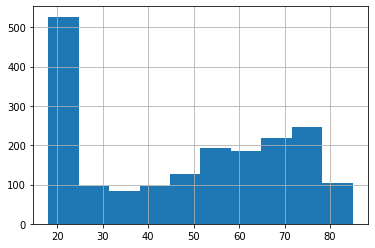

In [17]:
train.Age.hist()
plt.show()

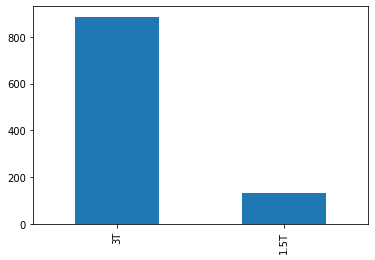

In [18]:
train.FieldStrength.value_counts().plot(kind='bar')
plt.show()

In [19]:
counts = list(train.FieldStrength.value_counts().values) + [train.FieldStrength.isna().sum(),]
labels = ["3T", "1.5T", "Unknown"]

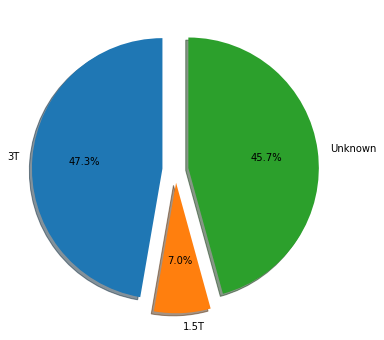

In [20]:
plt.ax = plt.subplots(1, 1, figsize=(12,6))
plt.pie(counts, explode=[0.1, 0.1, 0.1], labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)
plt.show()

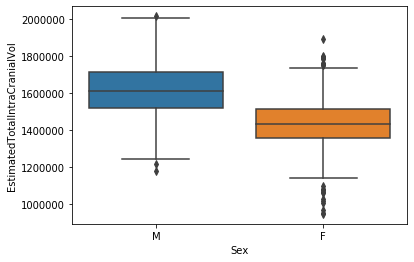

In [21]:
fig = sns.boxplot(x='Sex', y='EstimatedTotalIntraCranialVol', data=train)

# Feature selection and feature engineering

We leave this to you...

# BrainAge model

As an illustration, here's a very simple approach to create a model and generate some predictions. _You work to improve this!_

In [22]:
train.head()

,SubjectID,Source,ID,Sex,Height,Weight,FieldStrength,Handedness,Measure:volume,Left-Lateral-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent,eTIV_y,Age
0,1547,Other,NaN,M,NaN,NaN,NaN,NaN,0,26532.5,...,2.639,2.311,2.317,3.537,2.351,2.799,2.26426,1004741.0,1.397217e+06,78.4
1,768,SLIM,25825,F,NaN,NaN,3T,NaN,0,2284.7,...,3.104,2.730,3.147,4.030,2.865,3.294,2.73944,1112753.0,1.340906e+06,18.0
2,2077,SLIM,30901,F,NaN,NaN,3T,NaN,0,3234.5,...,2.982,2.833,2.723,3.224,2.453,3.093,2.63931,1127516.0,1.448150e+06,20.0
3,2076,SALD,31354,F,NaN,NaN,3T,100.0,0,9019.0,...,2.717,2.486,3.066,3.517,2.439,2.924,2.57008,1011328.0,1.318798e+06,56.0
4,2488,SLIM,30826,F,NaN,NaN,3T,NaN,0,4964.1,...,2.974,2.642,2.597,3.857,2.541,3.150,2.62909,1121589.0,1.461194e+06,19.0


In [23]:
# Collect all the numerical Freesurfer features in the train and test set:
X = train.drop(columns=['SubjectID', 'Source', 'ID', 'Sex', 'Height', 'Weight', 'FieldStrength', 'Handedness', 'Age'])
y = train.Age

Split off some data to be used to check our model's performance before submission:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# We'll use a random forest model: 
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

In [28]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Check the mean absolute error on the validation set:


In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
y_pred = rf.predict(X_val)

In [31]:
mean_absolute_error(y_val, y_pred)

6.135326141911932

It's useful to plot our predictions agains the actual ages in the validation set:

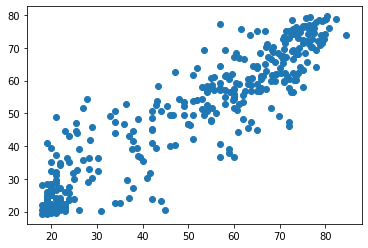

In [32]:
plt.scatter(y_val, y_pred)
plt.show()

Perfect predictions would generate a diagonal line from the bottom left to the top right. We see that our model is not totally useless, but also that it's far from perfect. 

It's also useful to take a look at the residuals `y_val - y_preds`. Ideally, these would be close to zero. 

In [33]:
y_residuals = y_val - y_pred

In [34]:
y_residuals[:10]

1831    8.884805
1198   -0.100000
1461   -3.370000
275    -1.800000
416    -2.300000
1034   -1.600000
247     3.895736
383    -0.600000
322     5.066530
203    -1.564750
Name: Age, dtype: float64

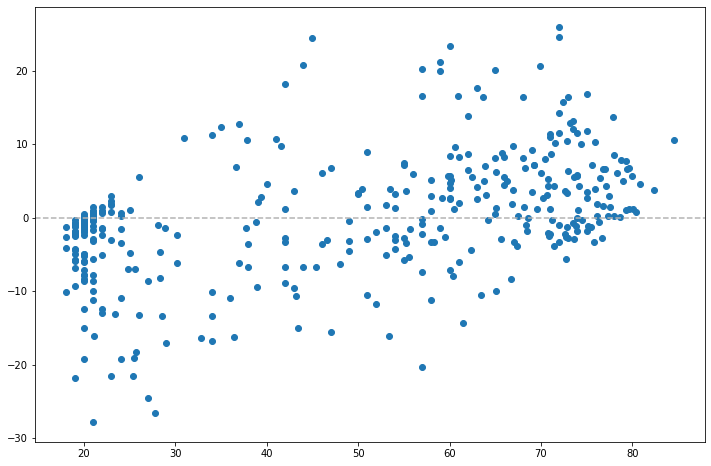

In [35]:
f, ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(y_val, y_residuals)
ax.axhline(y=0, xmin=0, xmax=100, linestyle='--', color='#b2b2b2')
plt.show()

The relatively large spread around the above diagonal is captured in the large standard deviation of the residuals:

In [36]:
y_residuals.std()

8.459426900932156

# Submission

After training your model and found predictions for the test data you have to create a CSV file containing `SubjectID` and your predictions in its two columns. 

Let's produce some predictions using the above model: 

In [37]:
test.head()

,SubjectID,Sex,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent,eTIV_y
0,1541,M,0,5854.8,215.5,15457.1,53968.8,6838.4,3138.6,4808.5,...,2.133,2.554,2.337,2.774,3.827,2.018,2.947,2.37916,1006715.0,1.351564e+06
1,494,M,0,6224.2,306.6,16640.6,56960.1,7633.4,2850.5,4416.0,...,2.224,3.003,2.622,2.986,4.340,2.550,3.258,2.59318,1131844.0,1.378325e+06
2,771,F,0,7119.3,302.9,17132.6,60629.2,8369.9,3678.7,4961.7,...,2.377,3.076,2.658,2.961,3.074,2.601,3.308,2.65192,1178012.0,1.487637e+06
3,397,M,0,8142.8,592.2,14954.5,61128.1,9311.8,3914.3,6324.5,...,2.302,3.030,2.618,3.196,3.622,2.503,3.109,2.60034,1271484.0,1.680459e+06
4,2398,M,0,21841.9,519.4,16929.6,58449.9,6978.4,3338.0,4578.8,...,1.931,2.388,2.167,2.388,3.499,1.755,2.527,2.20198,1203519.0,1.741686e+06


In [38]:
# We have to drop the columns not used when constructing the model:
X_test = test.drop(columns=['SubjectID', 'Sex'])

In [39]:
predicted_ages = rf.predict(X_test)

In [40]:
# We get 625 predictions:
predicted_ages.shape

(625,)

In [41]:
# Here are the first 10 predictions
predicted_ages[:10]

array([54.78695414, 33.04175222, 20.5       , 21.4       , 78.09      ,
       50.8670089 , 57.35100616, 29.75708419, 26.82402464, 69.12758385])

Here's one way to make a submission file:**

In [42]:
submission = pd.DataFrame({'ID': test.SubjectID, 'label': predicted_ages})

In [43]:
submission.head()

,ID,label
0,1541,54.786954
1,494,33.041752
2,771,20.500000
3,397,21.400000
4,2398,78.090000


In [40]:
submission.to_csv('submission.csv', index=False)

## If you're using a Kaggle kernel

After clicking "Publish" you will find a tab called "Output" in the top menu. If you click this you'll find "Submit to competition".

## If you're using Colab

Click "Files" on the left. You'll find `submission.csv` in the folder `Content`.

# Further explorations of the data

Remember that a score on the leaderboard is the goal of Part 1 of the challenge. In Part 2 (perhaps the more important part) you're asked to study the data and your results more carefully. 